In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style

matplotlib.use("WXAgg")
style.use('ggplot')
%matplotlib inline

data = pd.read_csv('attendees-anonymous.csv', parse_dates=[
        u'Ticket_Created_Date', 
        u'Ticket_Last_Updated_Date',
        u'Order_Created_Date',
        u'Order_Completed_Date'
   ])
data['count'] = pd.Series([1] * len(data), index=data.index)

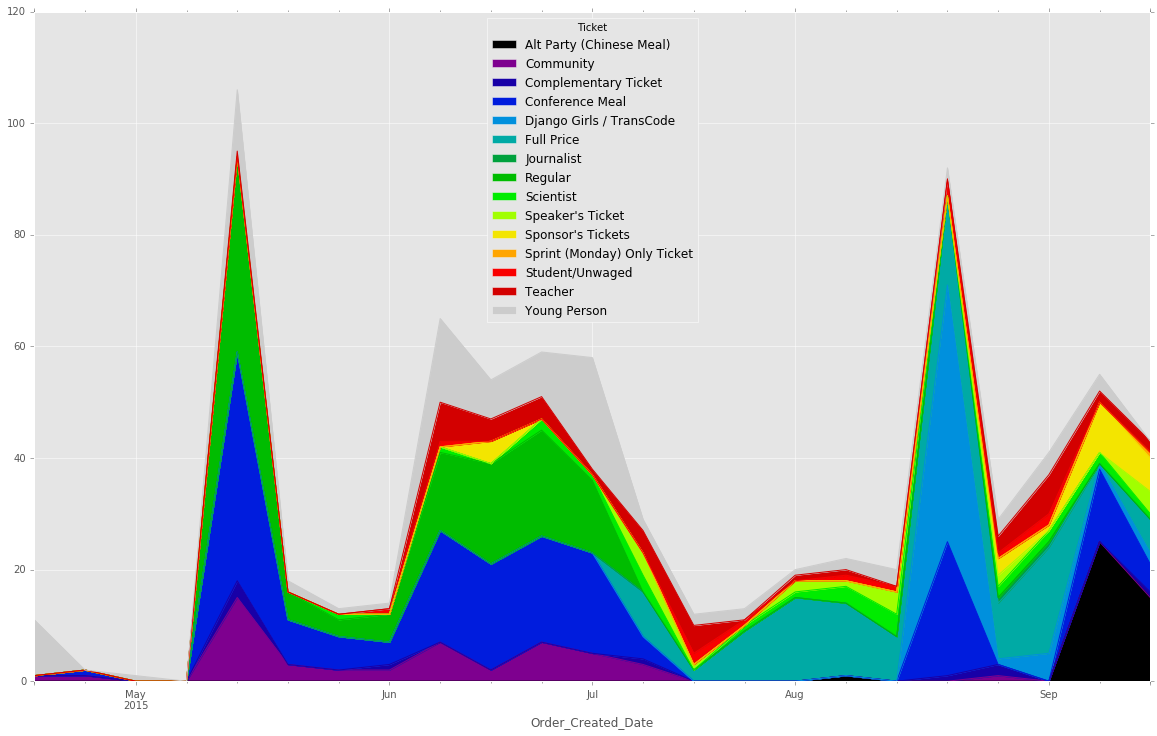

In [5]:
tickets = data[['Order_Created_Date', 'Ticket', 'count']]

#tickets = tickets[(tickets.Ticket != 'Conference Meal') & (tickets.Ticket != 'Alt Party (Chinese Meal)')]
tickets = tickets.set_index('Order_Created_Date')
tickets = tickets.groupby('Ticket')
tickets = tickets.resample('W', how='sum')
tickets = tickets.reset_index()
tickets = tickets.pivot(index='Order_Created_Date', columns='Ticket', values='count')
tickets = tickets.fillna(0)
tickets.plot(kind='area', figsize=(20,12), colormap='nipy_spectral')